# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
prevre = pd.read_csv('previsao_de_renda.csv', index_col=0)
prevre.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [42]:
prevre.dtypes

data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [43]:
prevre.isna().sum()

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [45]:
prevre_c1 = pd.get_dummies(prevre, columns=['sexo', 'posse_de_veiculo','posse_de_imovel', 'mau'], drop_first=True, dtype='int')
prevre_c1.head()

,data_ref,index,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,mau_True
0,2015-01-01,8682,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24,0,0,1,0
1,2015-01-01,12830,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14,1,1,1,0
2,2015-01-01,2885,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98,1,1,1,0
3,2015-01-01,16168,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69,0,1,0,0
4,2015-01-01,12438,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37,1,0,0,0


In [46]:
prevre_c2 = prevre_c1.drop(columns=['data_ref', 'index', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])
prevre_c2.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,mau_True
0,1,36,3.575342,3.0,3369.24,0,0,1,0
1,0,42,0.860274,2.0,6096.14,1,1,1,0
2,2,31,8.065753,4.0,5658.98,1,1,1,0
3,0,50,1.208219,2.0,7246.69,0,1,0,0
4,0,52,13.873973,2.0,4017.37,1,0,0,0


In [47]:
prevre_c2.columns = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'sexo_m', 'tem_posse_de_veiculo', 'tem_posse_de_imovel','devedor']
prevre2 = prevre_c2
prevre2.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_m,tem_posse_de_veiculo,tem_posse_de_imovel,devedor
0,1,36,3.575342,3.0,3369.24,0,0,1,0
1,0,42,0.860274,2.0,6096.14,1,1,1,0
2,2,31,8.065753,4.0,5658.98,1,1,1,0
3,0,50,1.208219,2.0,7246.69,0,1,0,0
4,0,52,13.873973,2.0,4017.37,1,0,0,0


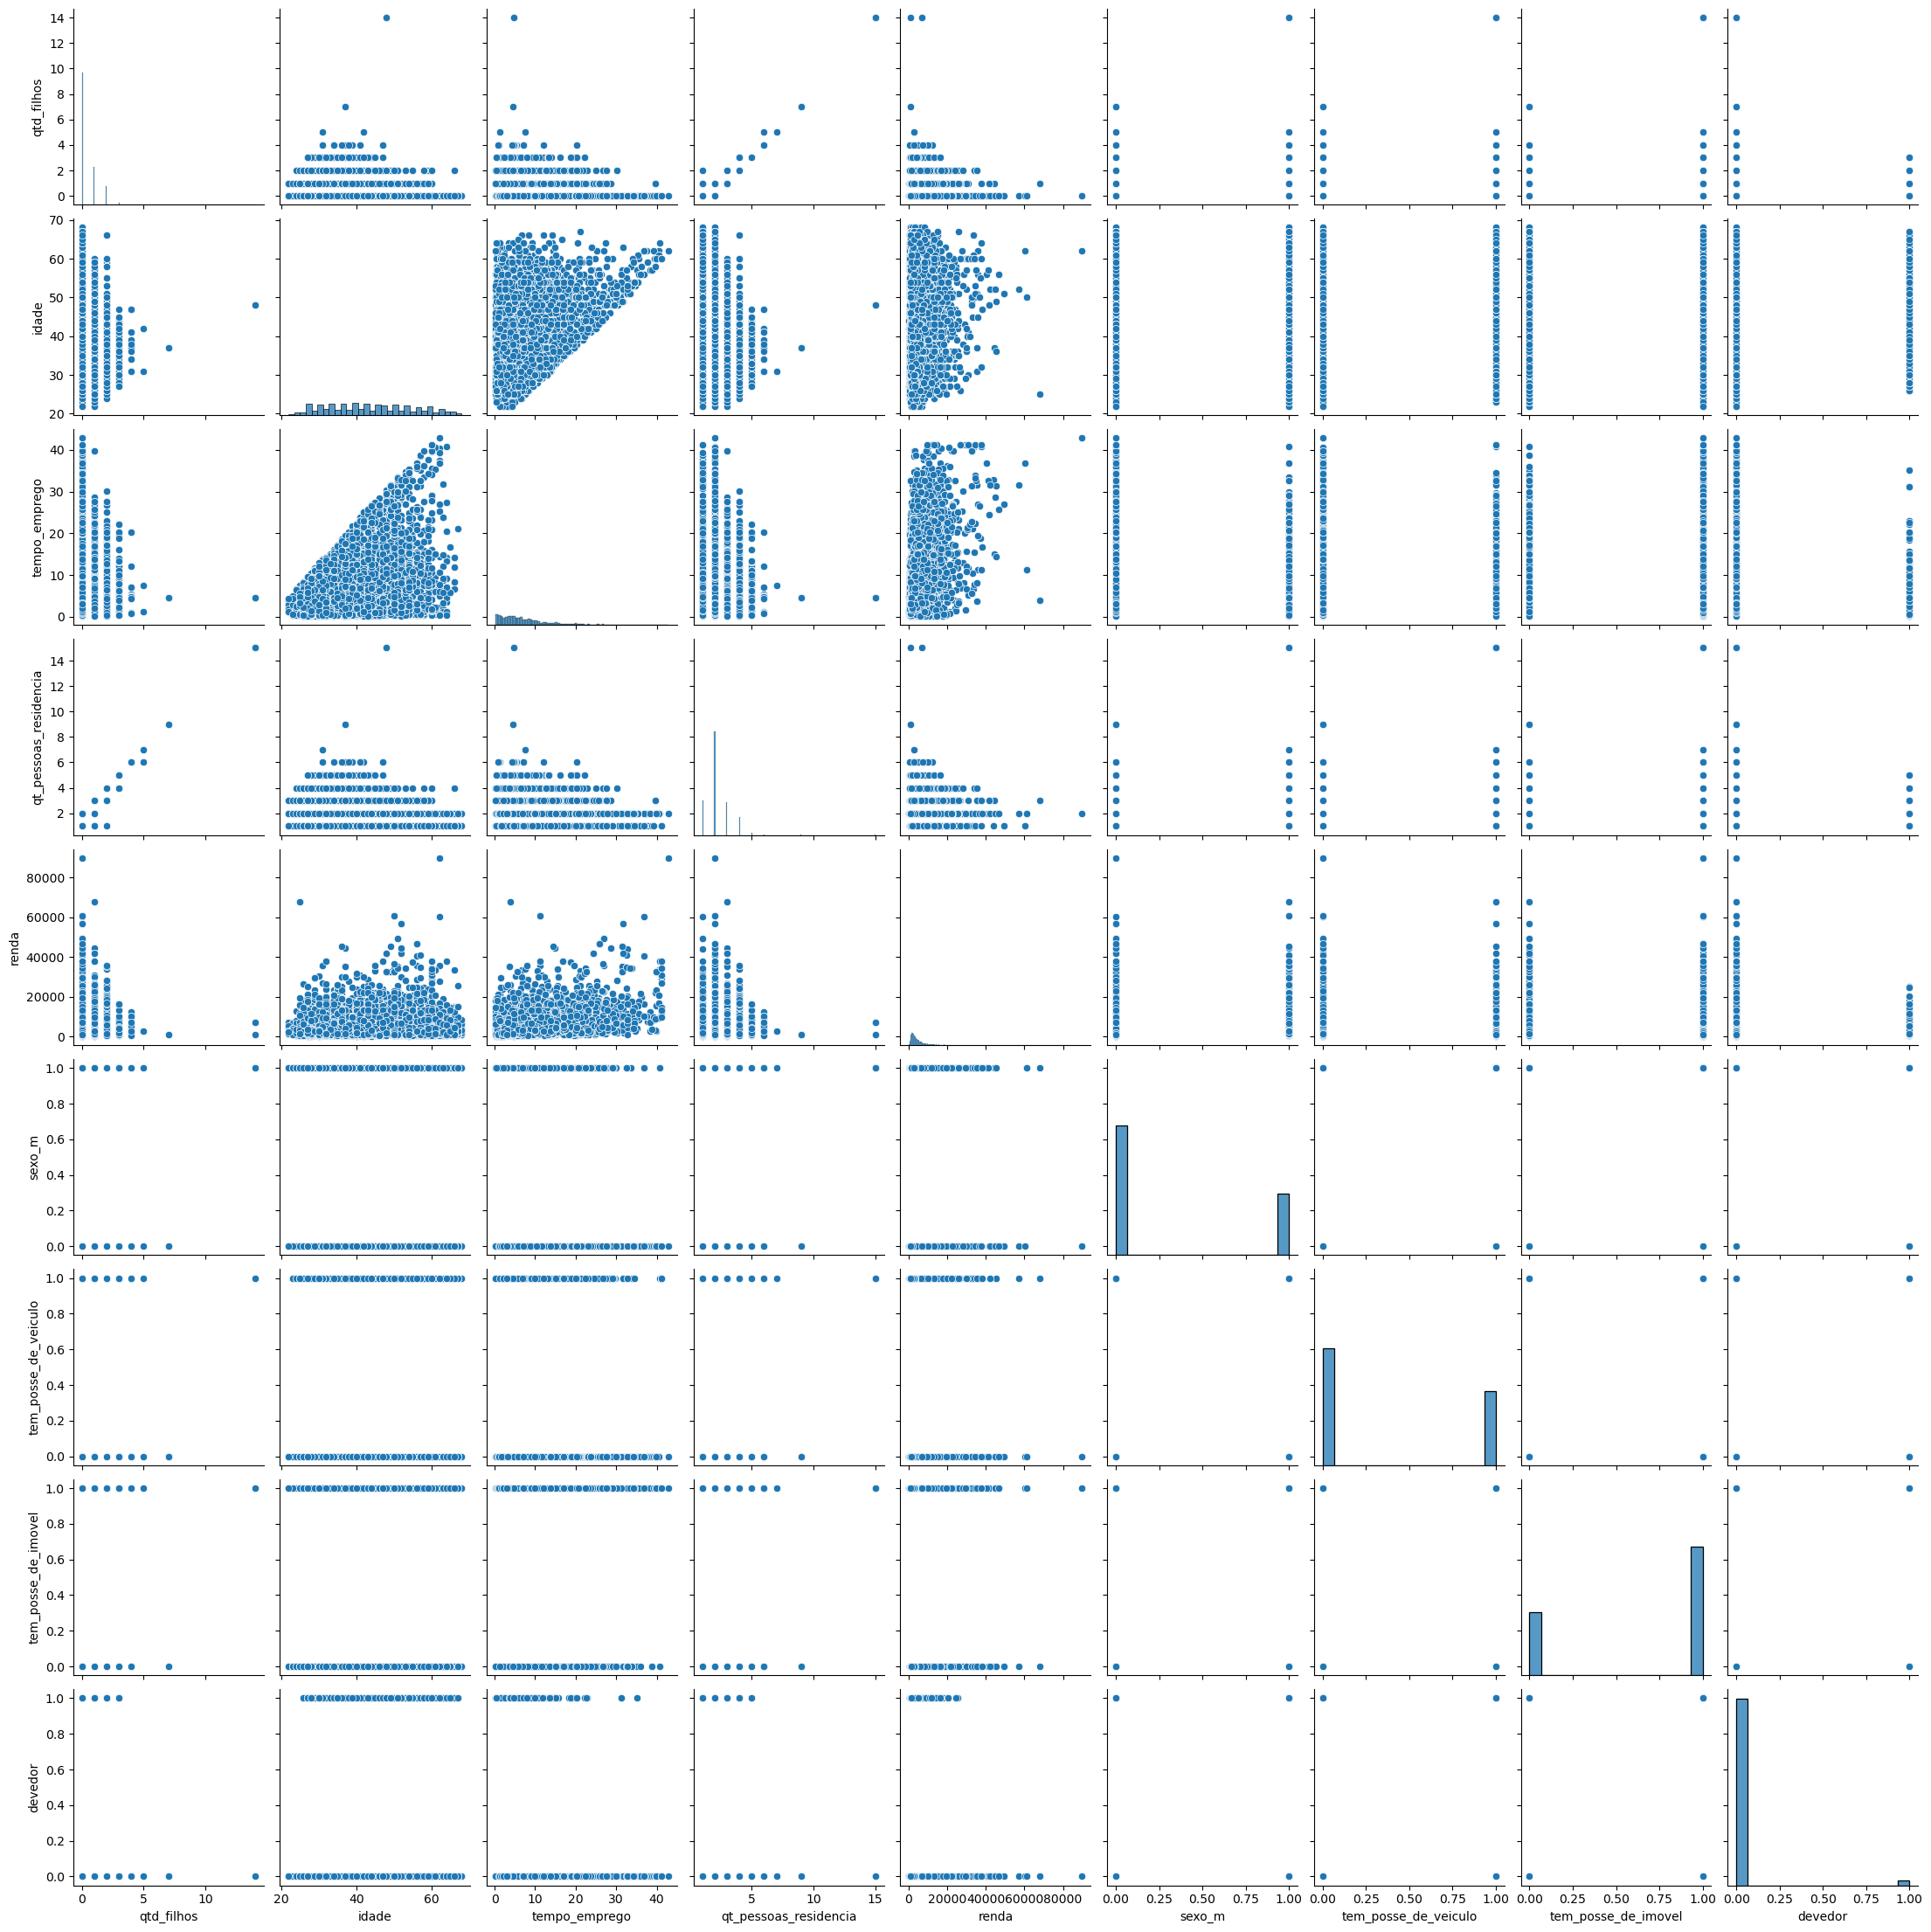

In [48]:
sns.pairplot(data = prevre2)

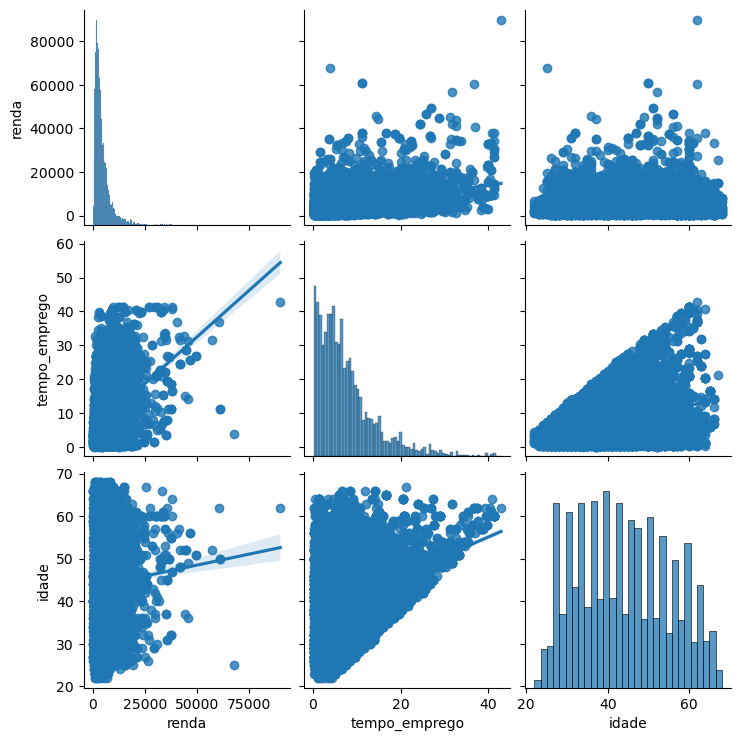

In [49]:
sns.pairplot(data = prevre2[['renda','tempo_emprego','idade']], kind='reg')

- É possivel notar as relações entre, a idade, o tempo de emprego e renda, mostrando quanto mais se envelhece trabalhando, maior a renda.

3) Na su aopinião, há outliers na variável renda?

<Axes: >

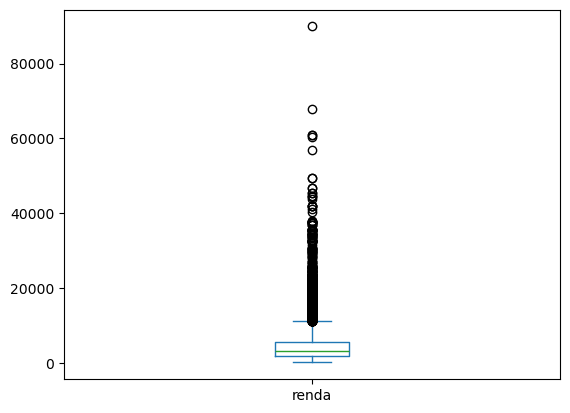

In [52]:
prevre2.renda.plot(kind='box')

- Sim, existe uma descrepância em relacao ao corpo do boxplot

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [99]:
df_log = prevre2.copy()
df_log["renda_log"] = np.log(df_log['renda'])
df_log

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_m,tem_posse_de_veiculo,tem_posse_de_imovel,devedor,renda_log
0,1,36,3.575342,3.0,3369.24,0,0,1,0,8.122442
1,0,42,0.860274,2.0,6096.14,1,1,1,0,8.715411
2,2,31,8.065753,4.0,5658.98,1,1,1,0,8.640999
3,0,50,1.208219,2.0,7246.69,0,1,0,0,8.888300
4,0,52,13.873973,2.0,4017.37,1,0,0,0,8.298383
...,...,...,...,...,...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29,1,1,1,0,7.084469
14996,1,30,12.079452,3.0,2519.18,1,1,1,0,7.831689
14997,0,40,2.161644,2.0,1586.85,0,1,1,0,7.369506
14998,0,47,3.295890,2.0,6975.39,0,0,1,0,8.850144


In [103]:
df_corr = df_log.corr(numeric_only=True)
df_corr

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_m,tem_posse_de_veiculo,tem_posse_de_imovel,devedor,renda_log
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.126175,0.107959,-0.002525,0.009544,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,-0.218183,-0.157837,0.122667,-0.011087,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,-0.146123,-0.087514,0.000112,-0.047722,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.159661,0.156009,-0.007180,-0.001555,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.180722,0.063414,0.029827,-0.011577,0.835734
sexo_m,0.126175,-0.218183,-0.146123,0.159661,0.180722,1.000000,0.373288,-0.044192,0.010563,0.235867
tem_posse_de_veiculo,0.107959,-0.157837,-0.087514,0.156009,0.063414,0.373288,1.000000,-0.014727,-0.017617,0.090529
tem_posse_de_imovel,-0.002525,0.122667,0.000112,-0.007180,0.029827,-0.044192,-0.014727,1.000000,-0.022499,0.045297
devedor,0.009544,-0.011087,-0.047722,-0.001555,-0.011577,0.010563,-0.017617,-0.022499,1.000000,-0.014193
renda_log,0.023743,0.024712,0.379556,0.036267,0.835734,0.235867,0.090529,0.045297,-0.014193,1.000000


<Axes: >

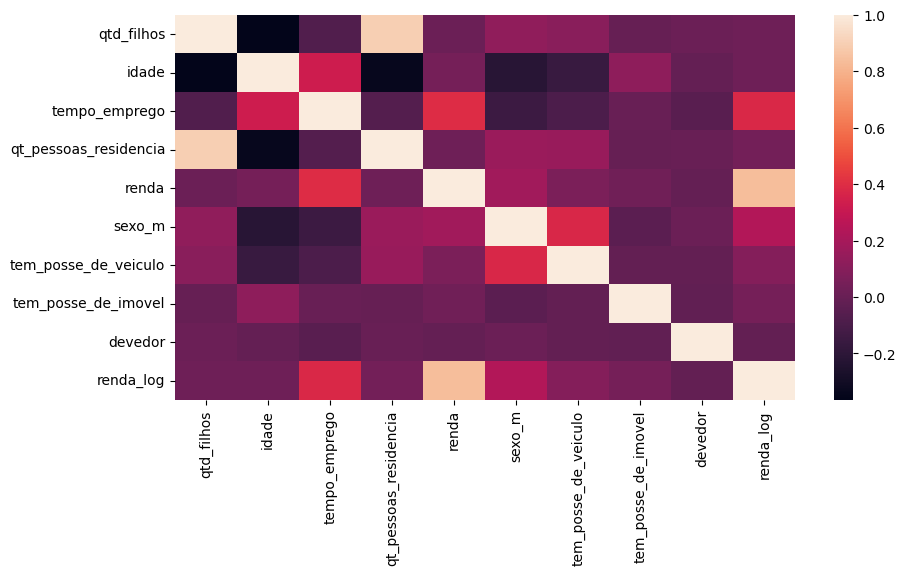

In [105]:
sns.heatmap(df_corr)

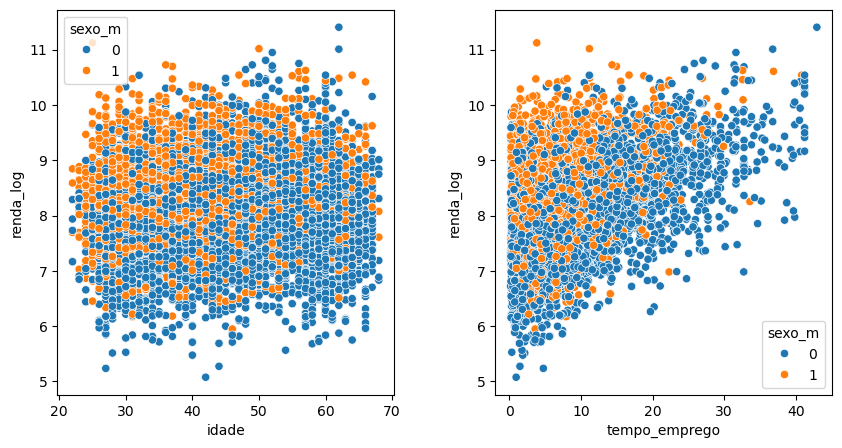

In [107]:
plt.rc('figure',figsize=(10,5))
fig, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.set_title("LOG RENDA x IDADE ")
ax1 = sns.scatterplot(ax=axes[0], x='idade', y='renda_log', data = df_log, hue='sexo_m')

ax2.set_title("LOG RENDA x TEMPO_EMPREGO ")
ax2 = sns.scatterplot(ax=axes[1], x='tempo_emprego', y='renda_log', data = df_log, hue='sexo_m')


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

- Ao fazer o LOG na coluna renda, podemos notar pelo heatmap, que ele deixa mais corelacionado do que o mesmo sem LOG.
- Com LOG ficou mais visível a curva de crescimento.